In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

merge_table = pd.merge(trial_data_df, mouse_df, on="Mouse ID", how="left")

# Display the data table for preview

merge_table.head()

## Tumor Response to Treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

# Convert to DataFrame

tumor_volume = merge_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_volume_mean = tumor_volume.mean()
tumor_volume_mean_df = tumor_volume_mean.reset_index()

# Preview DataFrame

tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# standard_error_means

tumor_volume_sem = tumor_volume.sem()
tumor_volume_sem_df = tumor_volume_sem.reset_index()

# Preview DataFrame

tumor_volume_sem.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#Munging to Re-Format the Data Frames
tumor_volume_mean_pivot = pd.pivot_table(tumor_volume_mean_df, values = 'Tumor Volume (mm3)', index = 'Timepoint', columns =["Drug"])
sems_pivot = pd.pivot(tumor_volume_sem_df, values = 'Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug')

# Preview that Reformatting worked
tumor_volume_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
sems_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


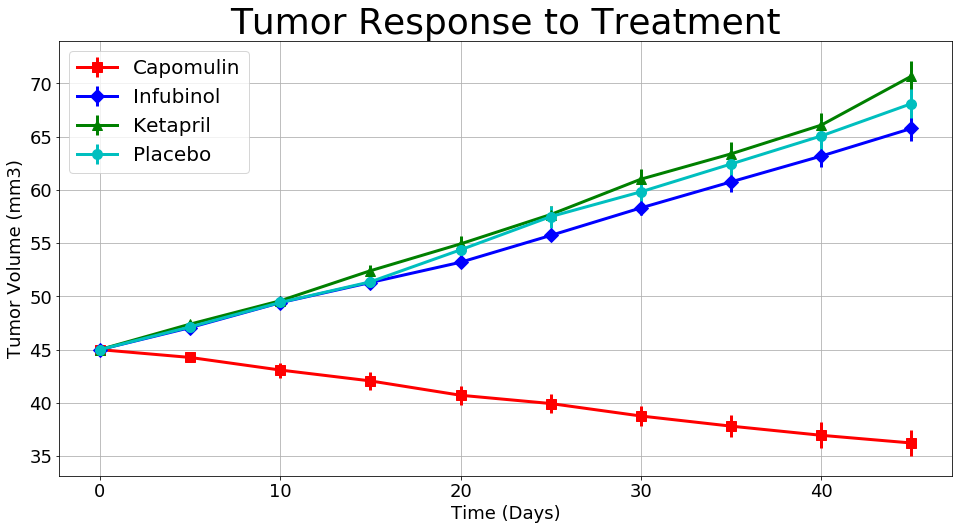

In [16]:
# Generate the Plot (with Error Bars)

x_axis = tumor_volume_mean_df['Timepoint'].unique().tolist()

mean_values= [tumor_volume_mean_pivot['Capomulin'].tolist(),
              tumor_volume_mean_pivot['Infubinol'].tolist(),
              tumor_volume_mean_pivot['Ketapril'].tolist(),
              tumor_volume_mean_pivot['Placebo'].tolist()]

error_values= [sems_pivot['Capomulin'].tolist(), sems_pivot['Infubinol'].tolist(), 
               sems_pivot['Ketapril'].tolist(),sems_pivot['Placebo'].tolist()]

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

mark_list = ['s','D','^','o']

color_list = ['r','b','g','c']

for x in range(4):
    plt.errorbar(x_axis, mean_values[x], error_values[x], label= drugs[x], marker=mark_list[x], 
                 color=color_list[x], markersize=10, linewidth=3)
    
plt.legend(loc="best", prop={'size': 20})
plt.xlabel("Time (Days)", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
plt.title('Tumor Response to Treatment', fontsize=36)
plt.grid()
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.savefig("Images/tumor_vol.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

metastatic_sites = merge_table.groupby(['Drug','Timepoint'])['Metastatic Sites']
metastatic_sites_mean = metastatic_sites.mean()
metastatic_sites_mean_df = metastatic_sites_mean.reset_index()

# Preview DataFrame

metastatic_sites_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

metastatic_sites_sem = metastatic_sites.sem()
metastatic_sites_sem_df = metastatic_sites_sem.reset_index()

# Preview DataFrame

metastatic_sites_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
#Munging to Re-Format the Data Frames
metastatic_sites_mean_pivot = pd.pivot_table(metastatic_sites_mean_df, values = 'Metastatic Sites', index = 'Timepoint', columns =["Drug"])
sems_meta_pivot = pd.pivot(metastatic_sites_sem_df, values = 'Metastatic Sites', index = 'Timepoint', columns = 'Drug')

# Preview that Reformatting worked
metastatic_sites_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


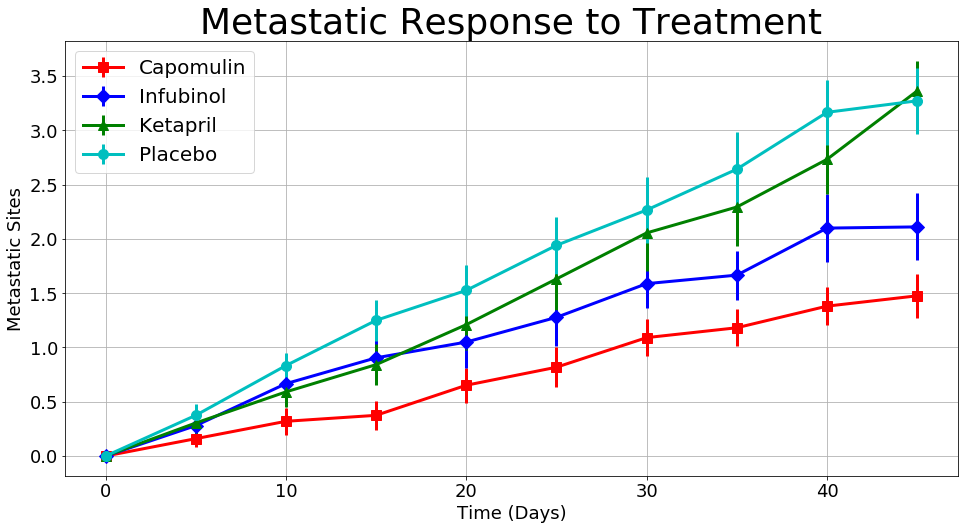

In [10]:
# Generate the Plot (with Error Bars)

meta_values= [metastatic_sites_mean_pivot['Capomulin'].tolist(),
              metastatic_sites_mean_pivot['Infubinol'].tolist(),
              metastatic_sites_mean_pivot['Ketapril'].tolist(),
              metastatic_sites_mean_pivot['Placebo'].tolist()]

meta_error_values= [sems_meta_pivot['Capomulin'].tolist(), sems_meta_pivot['Infubinol'].tolist(), 
               sems_meta_pivot['Ketapril'].tolist(),sems_meta_pivot['Placebo'].tolist()]


for x in range(4):
    plt.errorbar(x_axis, meta_values[x], meta_error_values[x], label= drugs[x], marker=mark_list[x], 
                 color=color_list[x], markersize=10, linewidth=3)
    
plt.legend(loc="best", prop={'size':20})
plt.xlabel("Time (Days)", fontsize=18)
plt.ylabel("Metastatic Sites", fontsize=18)
plt.title('Metastatic Response to Treatment', fontsize=36)
plt.grid()
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.savefig("Images/metastatic.png")
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice = merge_table[["Drug","Timepoint","Mouse ID"]]

# Convert to DataFrame

mice_alive_df = pd.DataFrame(mice.groupby(['Drug','Timepoint'], as_index=False).count())

# Preview DataFrame

mice_alive_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
#Munging to Re-Format the Data Frames
survival_pivot = pd.pivot_table(mice_alive_df, index = ["Timepoint"], columns = ["Drug"])

# Preview that Reformatting worked
survival_pivot.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

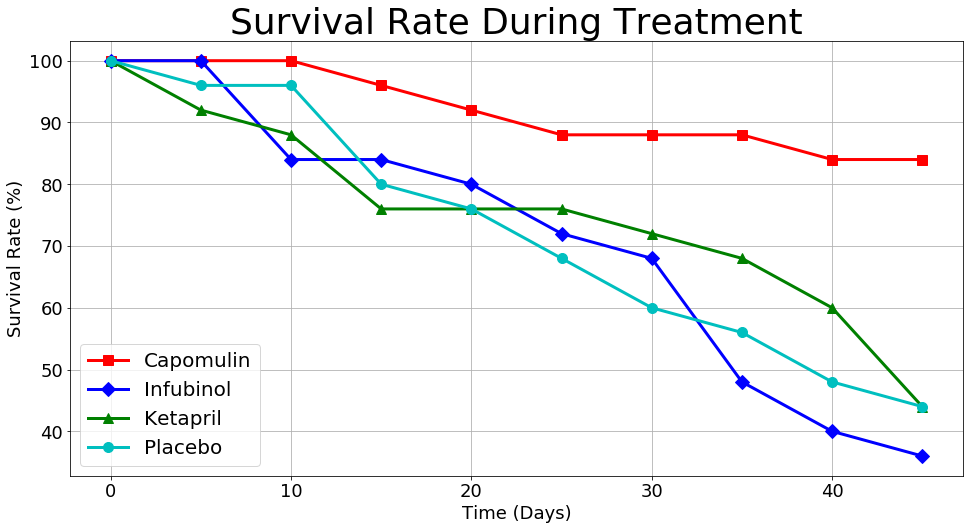

In [13]:
# Generate the Plot (Accounting for percentages)

counter = 0

for (columnName, columnData) in survival_pivot.iteritems():
    drug_name = columnName[1]
    column_contents= columnData.values.tolist()
    survival_rate=column_contents/columnData[0]*100
    
    if drug_name == "Capomulin" or drug_name == "Infubinol" or drug_name == "Ketapril" or drug_name == "Placebo":
        plt.plot(x_axis, survival_rate, label=drug_name, marker= mark_list[counter], 
                                color=color_list[counter], markersize=10, linewidth=3)
        
        counter +=1
    
plt.legend(loc="best", prop={'size':20})
plt.xlabel("Time (Days)", fontsize=18)
plt.ylabel("Survival Rate (%)", fontsize=18)
plt.title('Survival Rate During Treatment', fontsize=36)
plt.grid()
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.savefig("Images/survival_rate.png")
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm

changes = []

for (columnName, columnData) in tumor_volume_mean_pivot.iteritems():
    drug_name = columnName
    column_contents= columnData.values.tolist()
    percent_change = (column_contents-columnData[0])/columnData[0]*100
    change_value={"Drug":drug_name,"Change":round(percent_change[-1],2)}
    changes.append(change_value)

changes_df = pd.DataFrame(changes)

changes_df = changes_df.set_index('Drug')

changes_df


,Change
Drug,
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09


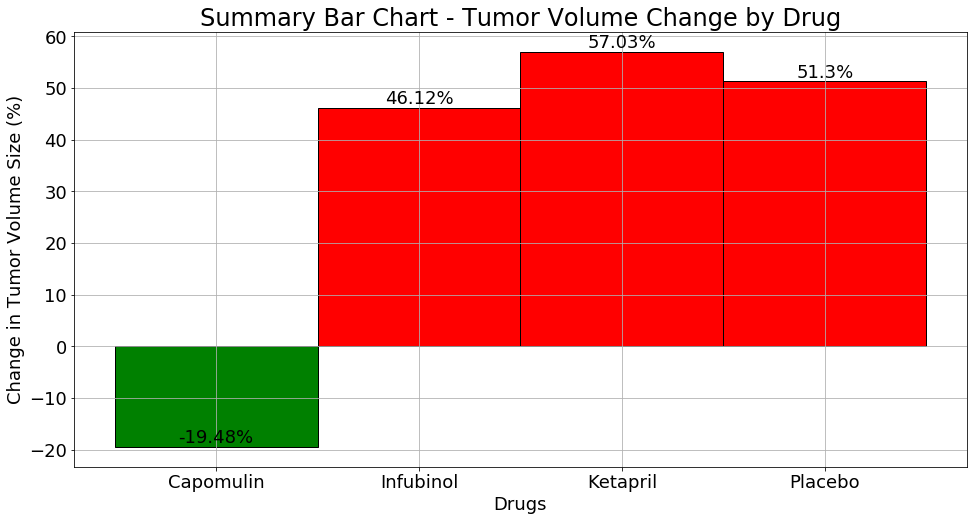

In [15]:
# Store all Relevant Percent Changes into a Tuple

relevant_df=changes_df.loc[['Capomulin','Infubinol','Ketapril','Placebo']]
relevant_values = tuple(list(relevant_df['Change']))
relevant_drugs = relevant_df.index.values

# Splice the data between passing and failing drugs

bins = [-20,0,60]
color = ["green","red"]

# Build dataframe
summary_df = pd.DataFrame({'y': relevant_values,
                   'x': relevant_drugs})
                           
summary_df["labels"] = pd.cut(summary_df['y'], bins, labels=color)


# Plot the figure.
plt.figure(figsize=(16, 8))
plt.title("Summary Bar Chart - Tumor Volume Change by Drug",fontsize = 24)
plt.xlabel("Drugs",fontsize=18)
plt.ylabel("Change in Tumor Volume Size (%)", fontsize=18)
plt.grid()

plt.bar(summary_df['x'], summary_df['y'], color = summary_df['labels'], edgecolor = "black", width=1, label = summary_df['y'])

for a,b in zip(summary_df['x'], summary_df['y']):
    plt.text(a, b, str(b)+"%", fontsize=18, ha="center", va="bottom")

# Use functions to label the pe"rcentages of changes
# Call functions to implement the function calls


# Save the Figure
plt.savefig("Images/summary.png")
